In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
import random

In [2]:
def contagion(prob):
    rnd_nr = random.random()
    if rnd_nr <= prob:
        rtn = 1
    else:
        rtn = 0
    return rtn

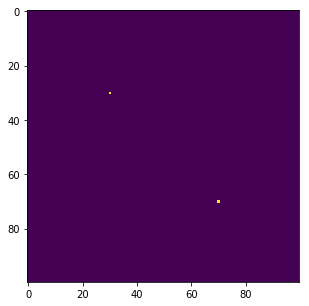

In [7]:
num_side = 100
X = np.zeros((num_side, num_side))
# X = np.random.rand(50, 50)
X[70, 70] = 1
X[30, 30] = 1

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
im = ax.imshow(X, cmap='viridis', interpolation='nearest')

In [8]:
cnt = len(np.nonzero(X)[0])
cnt_lst = [cnt]

In [9]:
def run_simulation(X, cnt_lst, steps=10):
    cnt = cnt_lst[-1]
    for _ in range(10):
        for y,x in zip(np.where(X != 0)[0], np.where(X != 0)[1]):
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if (i==0 and j==0):
                        continue
                    else:
                        xi, yj = x+i, y+j
                        # avoid beyond boundaries
                        if (xi < 0 or xi >= num_side or yj < 0 or yj >= num_side):
                            continue
                        else:
                            if X[yj, xi] == 1:  # ignore if already infected
                                continue
                            else:
                                X[yj, xi] = contagion(prob=0.2)
                                if X[yj, xi] == 1:
                                    cnt += 1
        cnt_lst.append(cnt)
    return X, cnt_lst

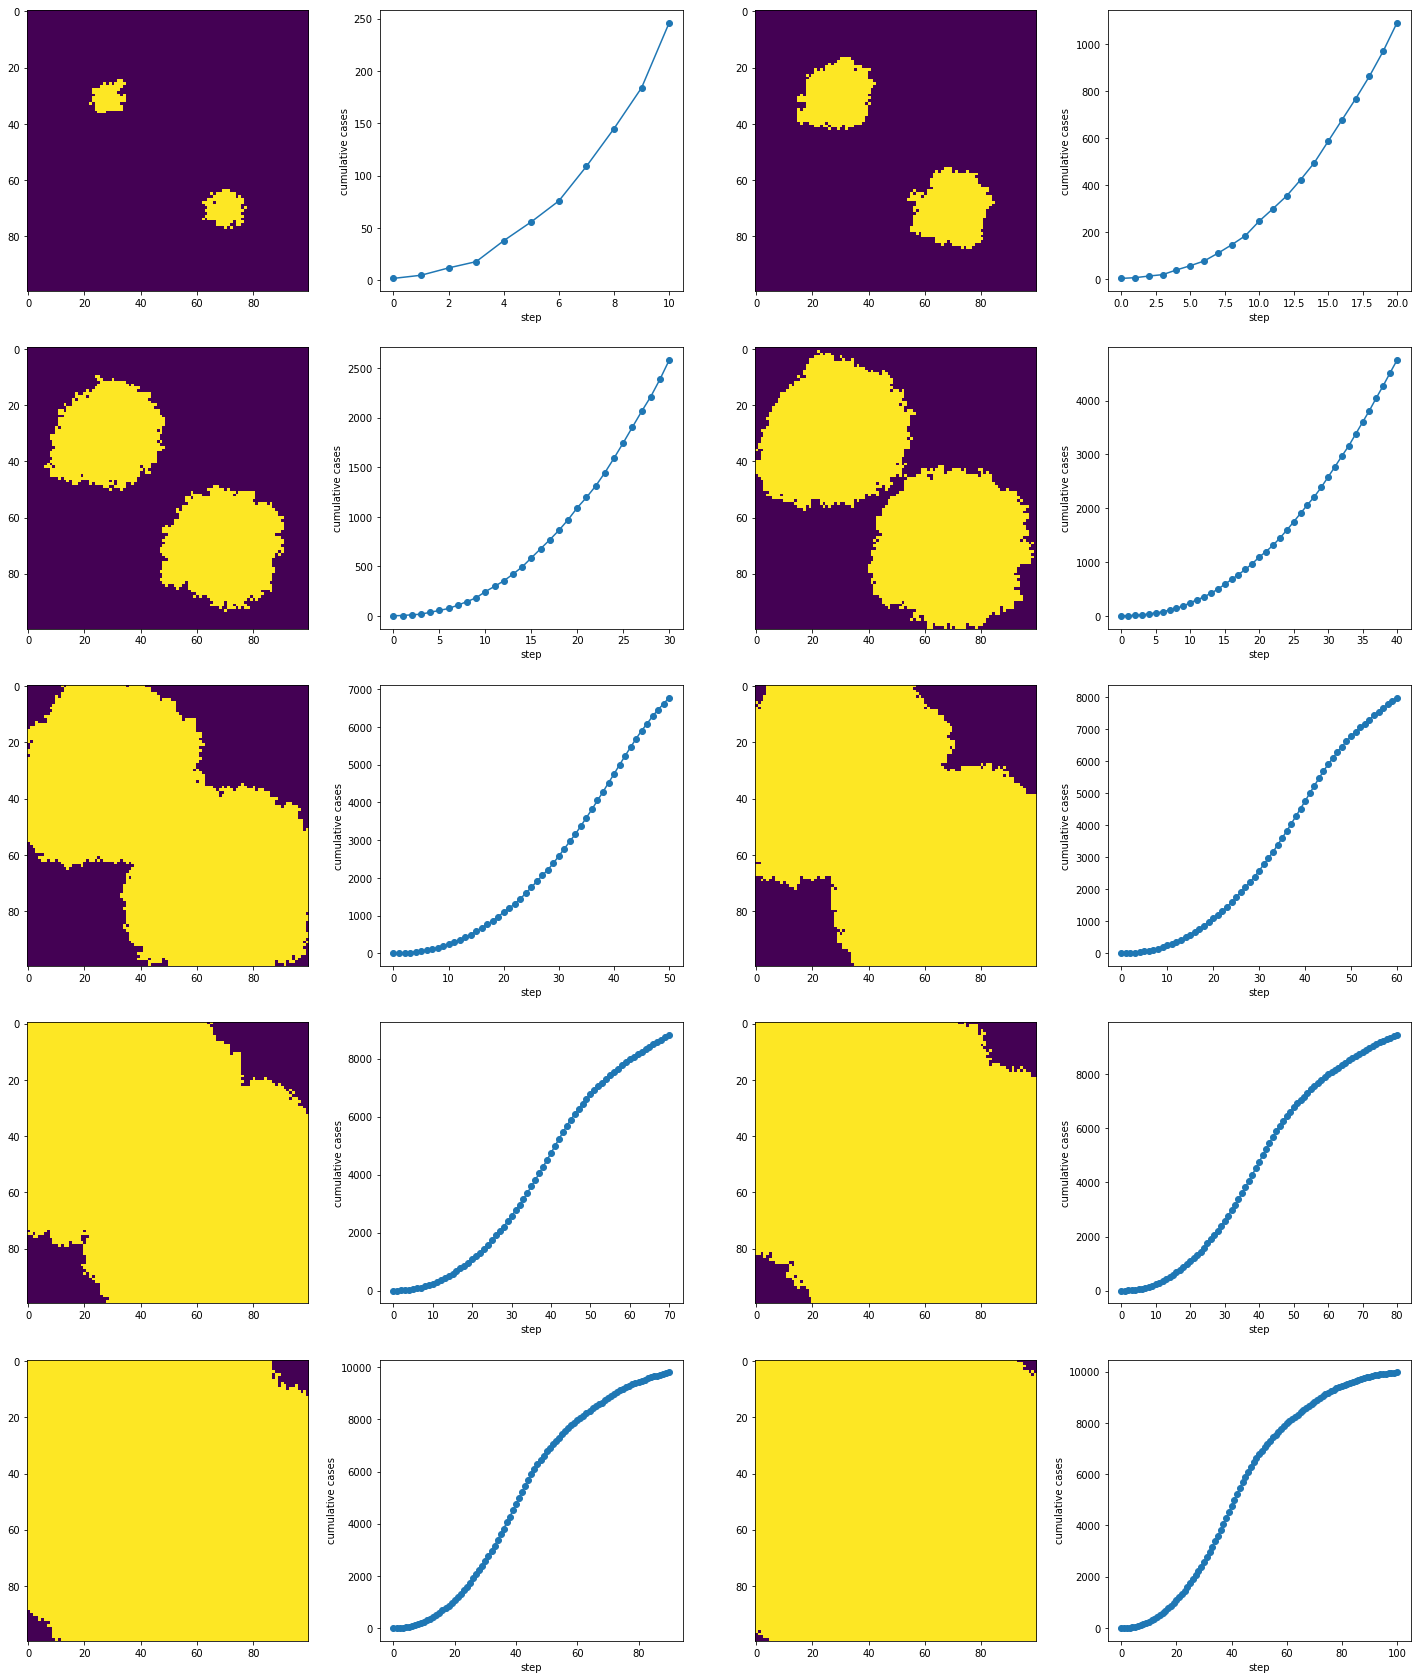

In [10]:
fig, ax = plt.subplots(5, 4)
fig.set_size_inches(25, 30)
for k in range(5):
    X, cnt_lst = run_simulation(X, cnt_lst, steps=3)
    ax[k,0].imshow(X, cmap='viridis', interpolation='nearest')
    ax[k,1].plot(cnt_lst, 'o-')
    ax[k,1].set_xlabel('step')
    ax[k,1].set_ylabel('cumulative cases')
    X, cnt_lst = run_simulation(X, cnt_lst, steps=3)
    ax[k,2].imshow(X, cmap='viridis', interpolation='nearest')
    ax[k,3].plot(cnt_lst, 'o-')
    ax[k,3].set_xlabel('step')
    ax[k,3].set_ylabel('cumulative cases')
# plt.tight_layout()
# fig.savefig('contagion_simulation.pdf', bbox_inches='tight');

In [11]:
fig.savefig('contagion_simulation.pdf', bbox_inches='tight');